In [1]:
import tensorflow 

import pandas as pd
import numpy as np
import os
import keras
import random
import cv2
import math
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split


from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,Convolution2D,BatchNormalization
from tensorflow.keras.layers import Flatten,MaxPooling2D,Dropout

from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array

from tensorflow.keras.models import Model

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau



In [2]:
! pip install kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d harshul23/garbage

Saving kaggle.json to kaggle.json
 97% 40.0M/41.0M [00:01<00:00, 19.6MB/s]
100% 41.0M/41.0M [00:01<00:00, 34.0MB/s]


In [3]:
!unzip garbage.zip

Archive:  garbage.zip
  inflating: dataset/Dataset/Test/Cardboard/cardboard10.jpg  
  inflating: dataset/Dataset/Test/Cardboard/cardboard100.jpg  
  inflating: dataset/Dataset/Test/Cardboard/cardboard101.jpg  
  inflating: dataset/Dataset/Test/Cardboard/cardboard102.jpg  
  inflating: dataset/Dataset/Test/Cardboard/cardboard103.jpg  
  inflating: dataset/Dataset/Test/Cardboard/cardboard104.jpg  
  inflating: dataset/Dataset/Test/Cardboard/cardboard105.jpg  
  inflating: dataset/Dataset/Test/Cardboard/cardboard106.jpg  
  inflating: dataset/Dataset/Test/Cardboard/cardboard107.jpg  
  inflating: dataset/Dataset/Test/Cardboard/cardboard108.jpg  
  inflating: dataset/Dataset/Test/Cardboard/cardboard109.jpg  
  inflating: dataset/Dataset/Test/Cardboard/cardboard11.jpg  
  inflating: dataset/Dataset/Test/Cardboard/cardboard110.jpg  
  inflating: dataset/Dataset/Test/Cardboard/cardboard111.jpg  
  inflating: dataset/Dataset/Test/Cardboard/cardboard112.jpg  
  inflating: dataset/Dataset/Test/C

In [4]:
!rm /content/dataset/Dataset/Train/cardboard/.ipynb_checkpoints
!rm /content/dataset/Dataset/Train/cardboard/Thumbs.db

rm: cannot remove '/content/dataset/Dataset/Train/cardboard/.ipynb_checkpoints': No such file or directory


In [5]:
from keras.applications.resnet_v2 import ResNet50V2
import tensorflow as tf

model = tf.keras.applications.ResNet50V2(input_shape=(128, 128, 3),
    include_top=False,
    weights="imagenet",
    classes=1000,
    classifier_activation="softmax",
)

y=model.output

y= GlobalAveragePooling2D()(y)
y= BatchNormalization()(y)
y= Dropout(0.5)(y)
y= Dense(1024,activation='relu')(y) 
y= Dense(512,activation='relu')(y) 
y= BatchNormalization()(y)
y= Dropout(0.5)(y)

preds=Dense(6,activation='softmax')(y) 

94683136/94668760 [==============================] - 1s 0us/step


In [6]:
model=Model(inputs=model.input,outputs=preds)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 134, 134, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 64, 64, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 pool1_pad (ZeroPadding2D)      (None, 66, 66, 64)   0           ['conv1_conv[0][0]']         

In [7]:
for layer in model.layers[:-8]:
    layer.trainable=False
    
for layer in model.layers[-8:]:
    layer.trainable=True

In [8]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 134, 134, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 64, 64, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 pool1_pad (ZeroPadding2D)      (None, 66, 66, 64)   0           ['conv1_conv[0][0]']         

In [9]:
main_dir = "dataset/Dataset"
data_train=[]
data_test=[]
labels_train=[]
labels_test=[]

In [10]:
path_train=sorted(list(os.listdir("/content/dataset/Dataset/Train")))
for img in path_train:
    path2train=sorted(list(os.listdir("/content/dataset/Dataset/Train"+'/'+img)))
    for i in path2train:
        image = cv2.imread(("/content/dataset/Dataset/Train"+'/'+img+'/'+i))
        image = cv2.resize(image, (128,128))
        image = img_to_array(image)
        data_train.append(image)
        l_train = label_train = img
        labels_train.append(l_train)

In [11]:
data_train = np.array(data_train, dtype="float32") / 255.0
labels_train = np.array(labels_train)
mlb = LabelBinarizer()
labels_train = mlb.fit_transform(labels_train)
print(labels_train[0])

[1 0 0 0 0 0]


In [12]:
path_test=sorted(list(os.listdir("/content/dataset/Dataset/Test")))
for img in path_test:
    path2test=sorted(list(os.listdir("/content/dataset/Dataset/Test"+'/'+img)))
    for i in path2test:
        imagetest = cv2.imread(("/content/dataset/Dataset/Test"+'/'+img+'/'+i))
        imagetest = cv2.resize(imagetest, (128,128))
        imagetest = img_to_array(imagetest)
        data_test.append(imagetest)
        l_test = label_test = img
        labels_test.append(l_test)

In [13]:
data_test = np.array(data_test, dtype="float32") / 255.0
labels_test = np.array(labels_test)
mlb = LabelBinarizer()
labels_test = mlb.fit_transform(labels_test)
print(labels_test[0])

[1 0 0 0 0 0]


In [14]:
(xtrain,ytrain)=(data_train,labels_train)
(xtest,ytest) = (data_test,labels_test)

In [15]:
anne = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-3)
checkpoint = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)

datagen = ImageDataGenerator(zoom_range = 0.2, horizontal_flip=True, shear_range=0.2)


datagen.fit(xtrain)

In [16]:
history = model.fit_generator(datagen.flow(xtrain, ytrain, batch_size=128),
               steps_per_epoch=xtrain.shape[0] //128,
               epochs=30,
               verbose=2,
               callbacks=[anne, checkpoint],
               validation_data=(xtrain, ytrain))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/30

Epoch 00001: val_loss improved from inf to 1.01969, saving model to model.h5


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


15/15 - 30s - loss: 1.7485 - accuracy: 0.4984 - val_loss: 1.0197 - val_accuracy: 0.6818 - lr: 0.0010 - 30s/epoch - 2s/step
Epoch 2/30

Epoch 00002: val_loss improved from 1.01969 to 0.74003, saving model to model.h5
15/15 - 14s - loss: 1.0106 - accuracy: 0.6925 - val_loss: 0.7400 - val_accuracy: 0.7594 - lr: 0.0010 - 14s/epoch - 924ms/step
Epoch 3/30

Epoch 00003: val_loss improved from 0.74003 to 0.46609, saving model to model.h5
15/15 - 13s - loss: 0.7812 - accuracy: 0.7400 - val_loss: 0.4661 - val_accuracy: 0.8345 - lr: 0.0010 - 13s/epoch - 894ms/step
Epoch 4/30

Epoch 00004: val_loss improved from 0.46609 to 0.38144, saving model to model.h5
15/15 - 13s - loss: 0.6599 - accuracy: 0.7664 - val_loss: 0.3814 - val_accuracy: 0.8656 - lr: 0.0010 - 13s/epoch - 895ms/step
Epoch 5/30

Epoch 00005: val_loss improved from 0.38144 to 0.30118, saving model to model.h5
15/15 - 13s - loss: 0.6410 - accuracy: 0.7838 - val_loss: 0.3012 - val_accuracy: 0.9007 - lr: 0.0010 - 13s/epoch - 886ms/step
E

Text(0.5, 0, 'epoch')

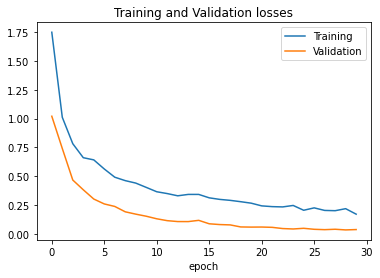

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation losses')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

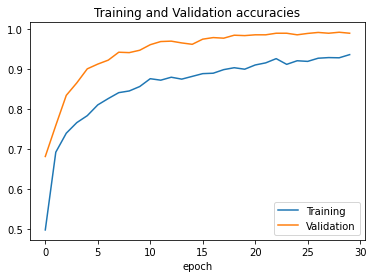

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation accuracies')
plt.xlabel('epoch')

In [19]:
accuracy = model.evaluate(xtest, ytest)
print("Accuracy of ResNet50v2 model on test data = ", accuracy[1] * 100, "%")

16/16 [==============================] - 2s 129ms/step - loss: 0.9689 - accuracy: 0.7435
Accuracy of ResNet50v2 model on test data =  74.35387969017029 %
